# CreditCard Veri Setinin Analizinin yapılması

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option("display.precision", 2)
frac = 0.00005

In [7]:
dataset = pd.read_csv('./Datasets/creditcard.csv');

## Özniteliklerin incelenmesi

In [8]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Time**: Bu işlem ile ilk işlem arasında geçen saniye sayısıdır.

**V1 - V2**: Kullanıcı kimlikleri ve hassas özellikleri (V1 - V28) korumak için PCA uygulanmıştır.

**Amount**: İşlemin miktarıdır.

Class: 1 ise sahtekarlıktır.

**PCA**: (Principal component analysis) Temel bileşen analizi, çok boyutlu uzaydaki bir verinin daha düşük boyutlu bir uzaya izdüşümünü, varyansı maksimize edecek şekilde bulma yöntemidir. Uzayda bir noktalar kümesi için, tüm noktalara ortalama uzaklığı en az olan "en uygun doğru" seçilir.

In [9]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['Class'] == 1].shape[0]))

Satır Sayısı: 284807
Öznitelik Syısı: 31
Fraud İşlem Sayısı: 492


In [21]:
dataset.loc[:,"Time":"V15"].sample(frac=frac)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
59927,49071.0,-3.16,-1.20,0.31,-0.64,2.76e-01,-0.29,0.14,-0.04,2.02,4.14e-01,1.14,1.08,-0.37,-0.38,0.56
107529,70480.0,1.26,0.26,-0.20,1.12,3.75e-01,0.07,0.18,-0.01,0.20,-2.90e-02,-1.27,-0.19,-0.58,0.34,0.37
205167,135620.0,1.95,0.25,-2.01,1.37,7.33e-01,-0.71,0.45,-0.22,0.34,-2.64e-01,-0.91,-0.33,-0.69,-0.69,0.15
201063,133717.0,1.74,-0.99,-0.54,0.30,-4.74e-01,0.70,-0.81,0.23,1.16,1.25e-01,-0.42,0.62,0.42,-0.18,0.16
81196,58826.0,1.19,0.27,0.44,1.44,-2.82e-01,-0.63,0.21,-0.20,0.19,-1.06e-01,-0.64,0.82,0.60,-0.10,-0.42
192624,129784.0,1.97,-1.12,-1.02,-0.69,-9.35e-01,-1.10,-0.36,-0.38,-0.32,6.96e-01,-0.62,-0.05,0.91,-0.36,-0.14
149303,90959.0,-0.11,0.55,1.48,0.16,-7.95e-03,0.35,-0.04,0.14,1.56,-8.28e-01,1.25,-1.97,1.51,1.46,-0.68
162141,114860.0,-0.41,0.93,0.34,-1.01,7.10e-01,-1.18,1.14,-0.25,-0.03,-4.99e-01,-0.94,0.34,0.28,0.03,-0.78
150160,92683.0,-0.61,1.20,-0.67,-0.90,1.76e+00,-1.49,1.61,-0.47,0.59,-1.51e+00,0.12,-3.77,0.02,1.06,-0.90
18543,29585.0,-0.61,0.12,0.54,-0.52,-2.25e-01,-0.40,1.73,-0.34,-0.48,-9.00e-01,-0.94,0.40,1.13,-0.15,-0.21


In [22]:
dataset.loc[:,"V16":"Class"].sample(frac=frac)

,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165114,-0.30,2.21e-03,0.09,-0.35,0.62,-0.85,1.72,0.24,1.09,-0.84,-0.28,0.45,3.67e-01,1.00,0
35135,0.09,-3.19e-01,-0.59,-0.61,0.07,-0.28,-0.86,0.19,0.16,-0.32,-0.02,0.37,2.92e-01,75.90,0
204202,-0.17,-6.54e-01,0.37,0.65,-0.31,0.13,0.37,-0.09,-0.11,0.46,0.25,-0.10,-9.49e-02,0.75,0
70079,-0.13,5.17e-01,-1.56,-1.86,-0.22,0.11,0.27,0.12,-1.34,-0.56,0.86,0.18,8.10e-02,0.77,0
84874,0.72,-7.12e-01,0.23,0.44,-0.07,-0.11,-0.35,0.05,0.06,0.12,0.91,-0.08,-5.14e-03,0.75,0
76264,0.68,-8.49e-01,0.82,0.30,0.37,0.26,0.44,-0.06,1.01,-0.05,0.22,0.12,1.49e-01,60.66,0
273273,0.10,-1.34e-01,-0.09,0.43,-0.33,-0.06,-0.45,-0.23,0.04,0.33,-0.50,-0.96,2.64e-02,50.00,0
151413,-2.41,2.14e+00,0.55,3.53,0.23,-0.02,0.43,-0.42,1.16,0.63,0.43,0.06,7.04e-02,7.56,0
100579,0.12,-7.64e-01,-0.10,-0.90,-0.21,0.11,0.48,-0.12,0.38,-0.09,-0.62,-0.58,-3.58e-01,6.61,0
247782,0.28,-4.27e-01,1.18,0.52,0.09,0.44,0.93,-0.24,0.70,-0.10,-0.43,0.08,-2.29e-02,0.00,0


Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Özniteliklerin sahip oldukları benzersiz değer sayıları gösterilmiştir.

In [38]:
for column in dataset.columns:
  print("{} {}".format(column, dataset[column].nunique()))

Time 124592
V1 275663
V2 275663
V3 275663
V4 275663
V5 275663
V6 275663
V7 275663
V8 275663
V9 275663
V10 275663
V11 275663
V12 275663
V13 275663
V14 275663
V15 275663
V16 275663
V17 275663
V18 275663
V19 275663
V20 275663
V21 275663
V22 275663
V23 275663
V24 275663
V25 275663
V26 275663
V27 275663
V28 275663
Amount 32767
Class 2


Sayısal Değişkenlerin istatiskleri çıkarılmıştır.

In [19]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.48e+04,47488.15,0.00,54201.50,8.47e+04,139320.50,172792.00
V1,284807.0,1.17e-15,1.96,-56.41,-0.92,1.81e-02,1.32,2.45
V2,284807.0,3.42e-16,1.65,-72.72,-0.60,6.55e-02,0.80,22.06
V3,284807.0,-1.38e-15,1.52,-48.33,-0.89,1.80e-01,1.03,9.38
V4,284807.0,2.07e-15,1.42,-5.68,-0.85,-1.98e-02,0.74,16.88
V5,284807.0,9.60e-16,1.38,-113.74,-0.69,-5.43e-02,0.61,34.80
V6,284807.0,1.49e-15,1.33,-26.16,-0.77,-2.74e-01,0.40,73.30
V7,284807.0,-5.56e-16,1.24,-43.56,-0.55,4.01e-02,0.57,120.59
V8,284807.0,1.21e-16,1.19,-73.22,-0.21,2.24e-02,0.33,20.01
V9,284807.0,-2.41e-15,1.10,-13.43,-0.64,-5.14e-02,0.60,15.59


## Veri setinin özniteliklerinin arasındaki ilişkinin incelenmesi

In [23]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00e+00,1.17e-01,-1.06e-02,-4.20e-01,-1.05e-01,1.73e-01,-6.30e-02,8.47e-02,-3.69e-02,-8.66e-03,...,4.47e-02,1.44e-01,5.11e-02,-1.62e-02,-2.33e-01,-4.14e-02,-5.13e-03,-9.41e-03,-1.06e-02,-1.23e-02
V1,1.17e-01,1.00e+00,4.14e-16,-1.23e-15,-9.22e-16,1.81e-17,-6.51e-16,-1.01e-15,-2.43e-16,-1.51e-16,...,-2.46e-16,-4.29e-16,6.17e-16,-4.43e-17,-9.61e-16,-1.58e-17,1.20e-16,2.08e-15,-2.28e-01,-1.01e-01
V2,-1.06e-02,4.14e-16,1.00e+00,3.24e-16,-1.12e-15,5.16e-16,2.79e-16,2.06e-16,-5.38e-17,1.98e-17,...,-8.48e-17,1.53e-16,1.63e-16,1.25e-17,-4.48e-16,2.06e-16,-4.97e-16,-5.09e-16,-5.31e-01,9.13e-02
V3,-4.20e-01,-1.23e-15,3.24e-16,1.00e+00,4.71e-16,-6.54e-17,1.63e-15,4.90e-16,-1.27e-15,5.57e-16,...,5.71e-17,-1.13e-15,-4.98e-16,2.69e-19,-1.10e-15,-1.24e-16,1.05e-15,9.78e-16,-2.11e-01,-1.93e-01
V4,-1.05e-01,-9.22e-16,-1.12e-15,4.71e-16,1.00e+00,-1.72e-15,-7.49e-16,-4.10e-16,5.70e-16,6.92e-16,...,-1.95e-16,-6.28e-17,9.16e-17,1.58e-16,6.07e-16,-4.25e-16,3.98e-17,-2.76e-18,9.87e-02,1.33e-01
V5,1.73e-01,1.81e-17,5.16e-16,-6.54e-17,-1.72e-15,1.00e+00,2.41e-16,2.72e-16,7.44e-16,7.39e-16,...,-3.92e-16,1.25e-16,-8.43e-18,-1.15e-15,4.81e-16,4.32e-16,6.59e-16,-5.61e-18,-3.86e-01,-9.50e-02
V6,-6.30e-02,-6.51e-16,2.79e-16,1.63e-15,-7.49e-16,2.41e-16,1.00e+00,1.19e-16,-1.10e-16,4.13e-16,...,5.83e-17,-4.71e-19,1.05e-16,-1.07e-15,4.56e-16,-1.36e-16,-4.45e-16,2.59e-16,2.16e-01,-4.36e-02
V7,8.47e-02,-1.01e-15,2.06e-16,4.90e-16,-4.10e-16,2.72e-16,1.19e-16,1.00e+00,3.34e-16,1.12e-15,...,-2.03e-16,-8.90e-16,-4.39e-16,7.43e-18,-3.09e-16,-9.66e-16,-1.78e-15,-2.78e-16,3.97e-01,-1.87e-01
V8,-3.69e-02,-2.43e-16,-5.38e-17,-1.27e-15,5.70e-16,7.44e-16,-1.10e-16,3.34e-16,1.00e+00,4.36e-16,...,3.89e-16,2.03e-16,6.38e-17,-1.05e-16,-4.65e-16,-1.73e-16,1.30e-16,-6.20e-16,-1.03e-01,1.99e-02
V9,-8.66e-03,-1.51e-16,1.98e-17,5.57e-16,6.92e-16,7.39e-16,4.13e-16,1.12e-15,4.36e-16,1.00e+00,...,1.94e-16,-7.07e-16,-5.21e-16,-1.43e-16,6.76e-16,-7.89e-16,-6.71e-17,1.11e-15,-4.42e-02,-9.77e-02


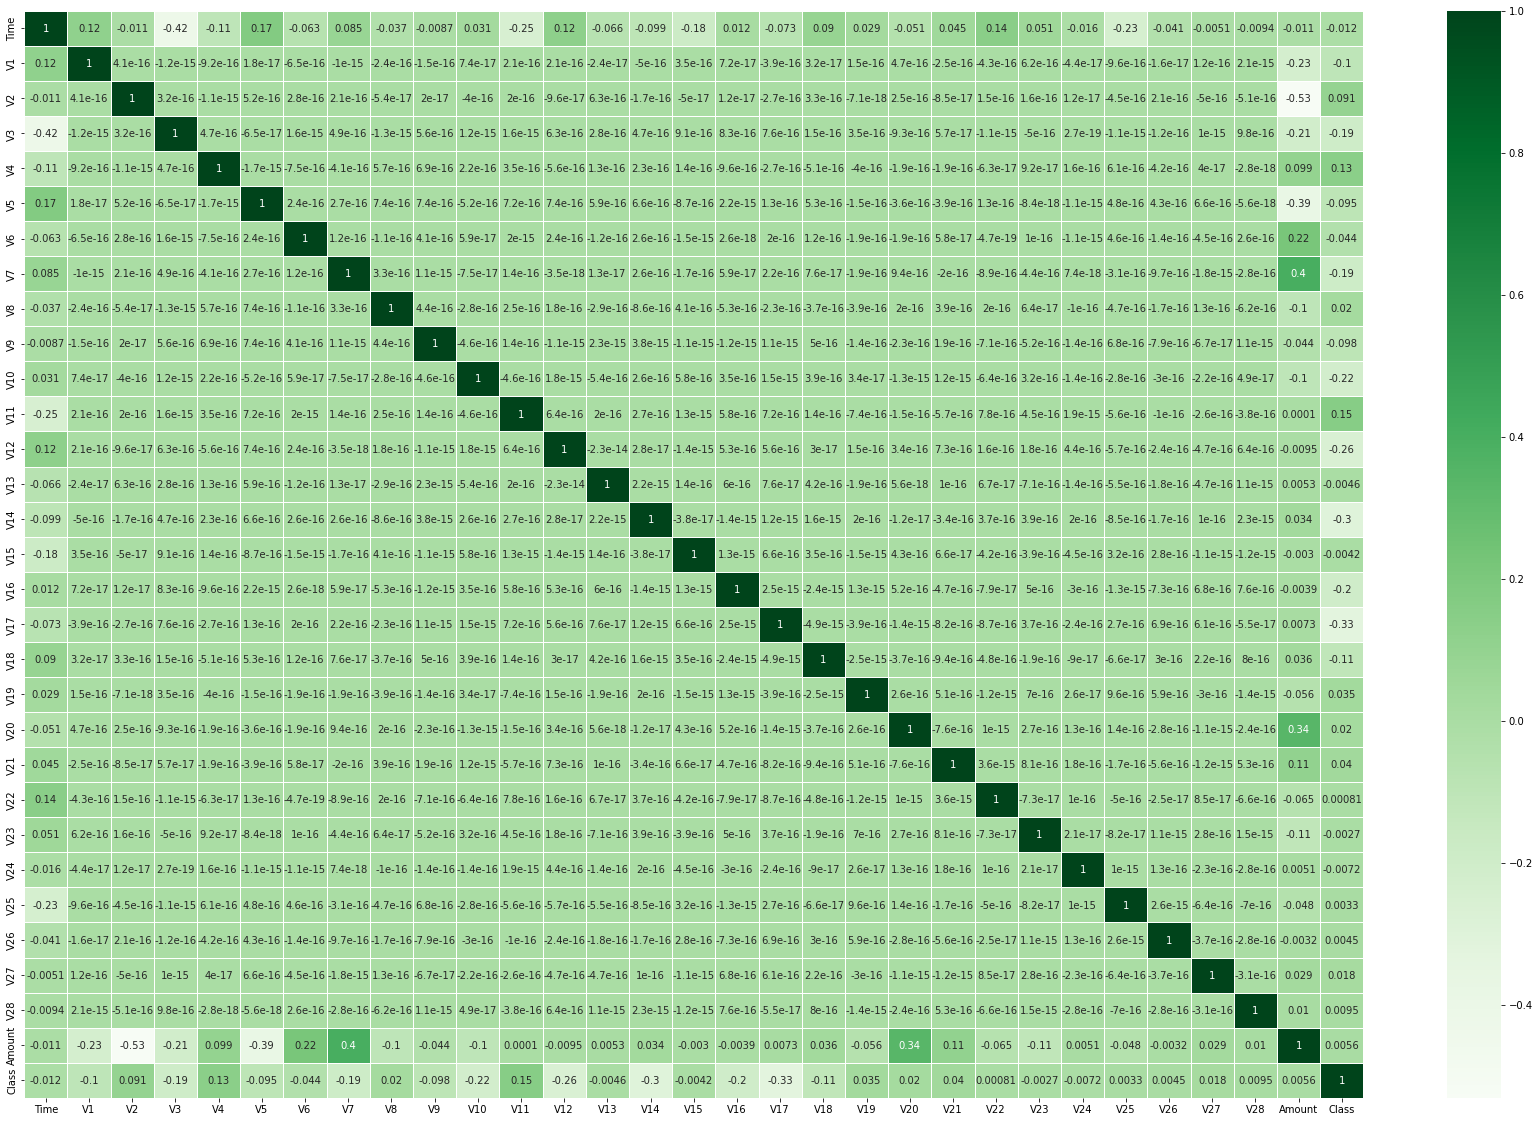

In [31]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

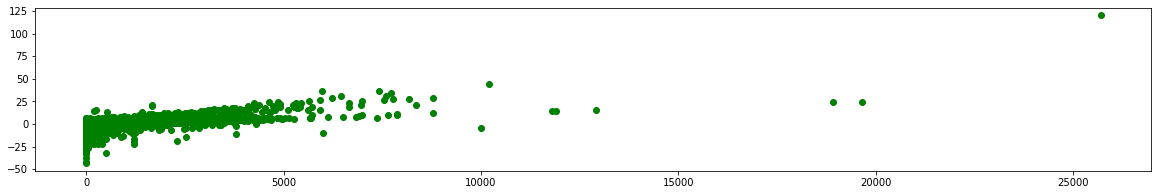

In [32]:
plt.figure(figsize=(20,3))
plt.scatter(dataset['Amount'], dataset['V7'], c='green');

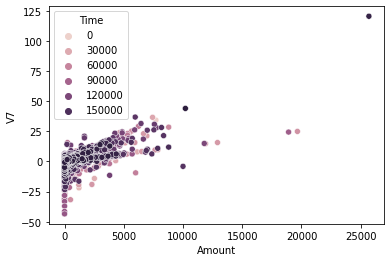

In [34]:
sns.scatterplot(x="Amount", y="V7", hue="Time", data=dataset);

Sayısal Değişkenlerin Dağılımı gösterilmiştir.

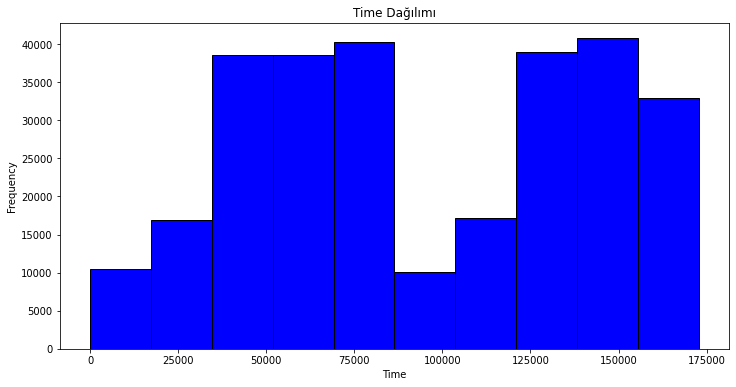

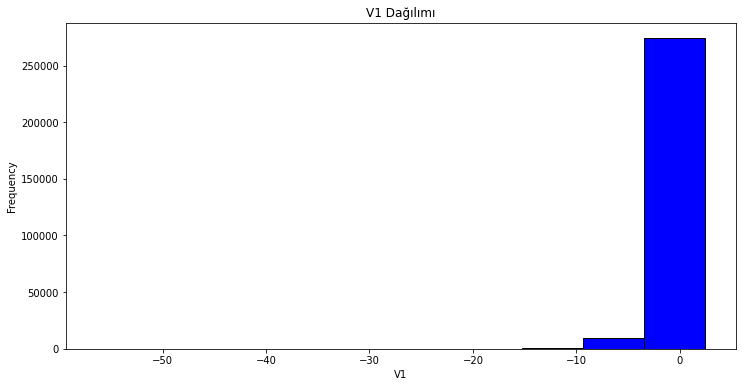

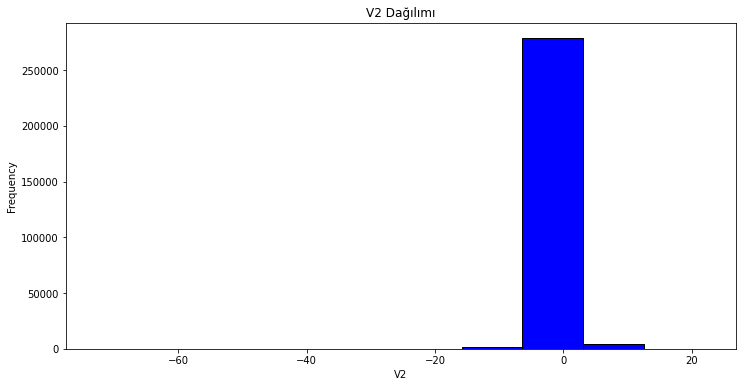

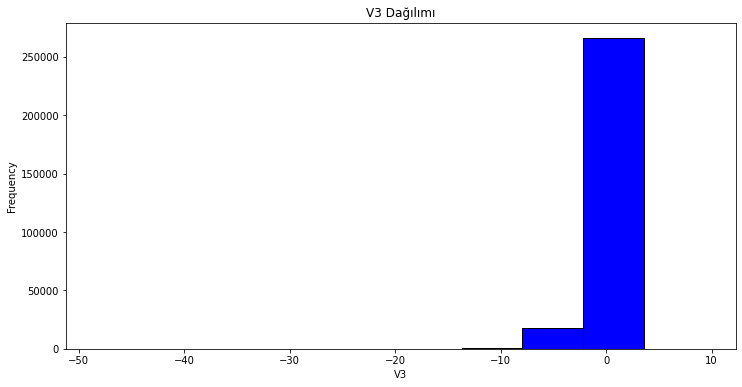

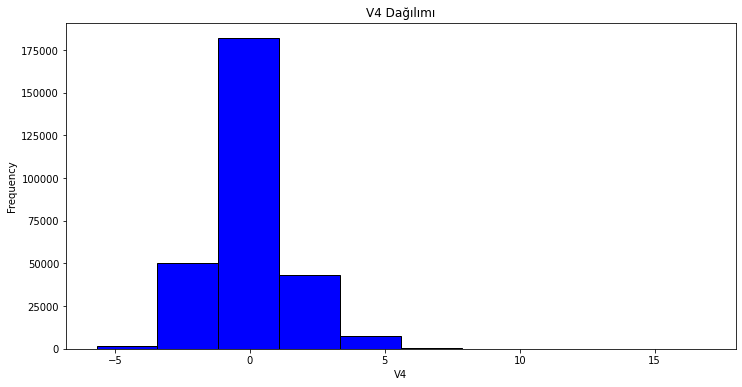

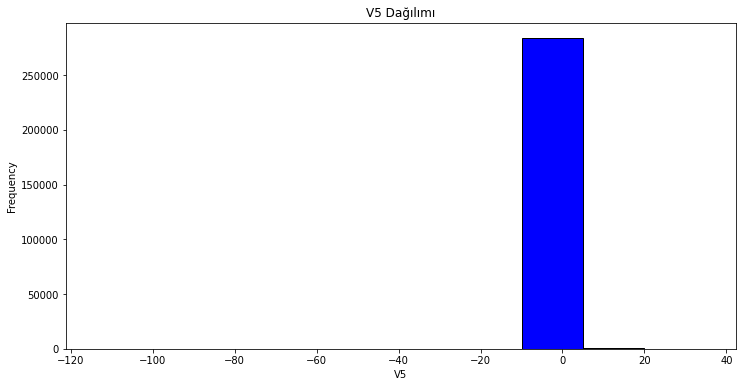

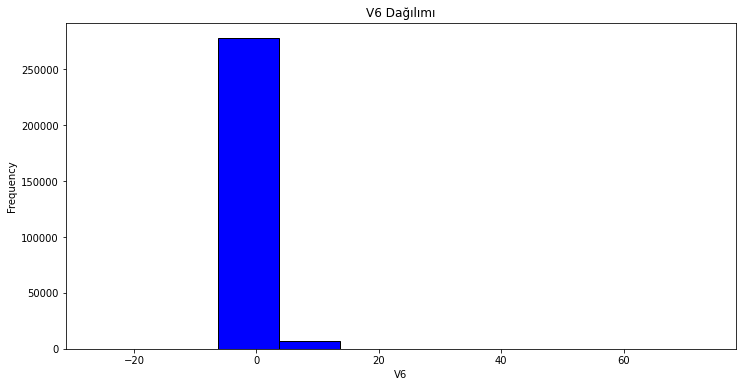

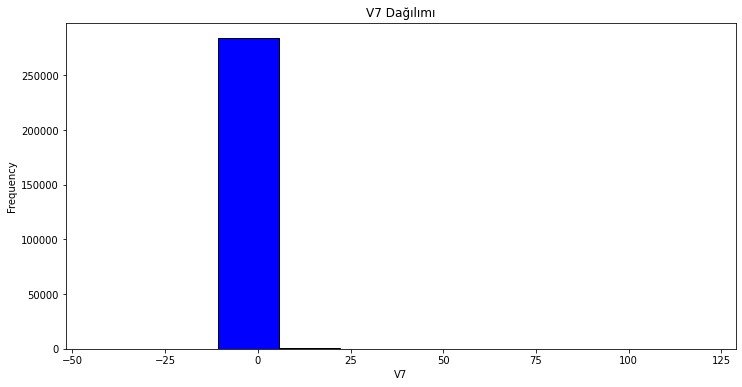

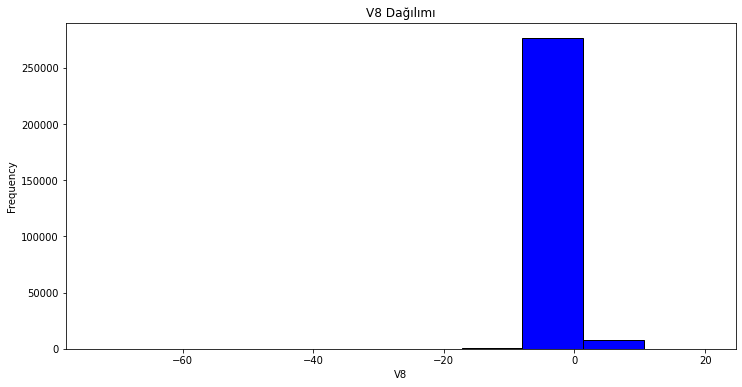

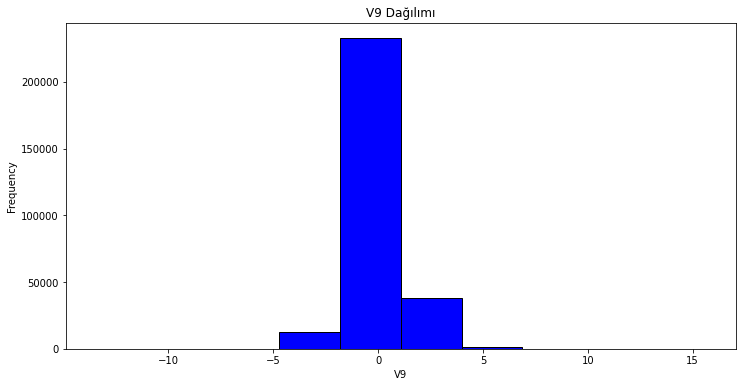

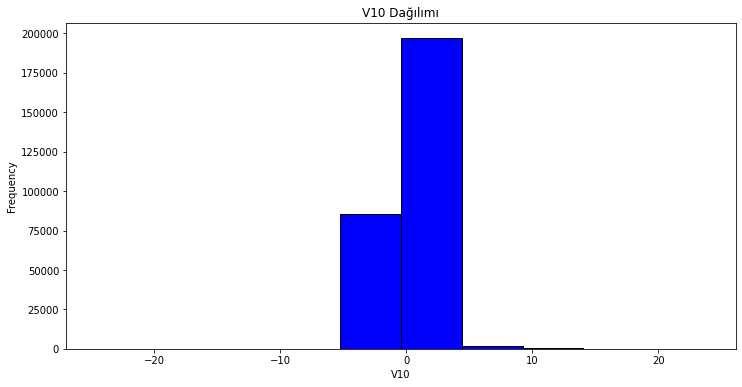

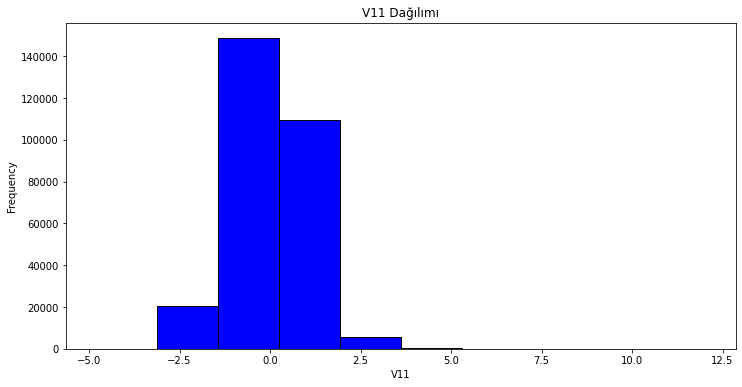

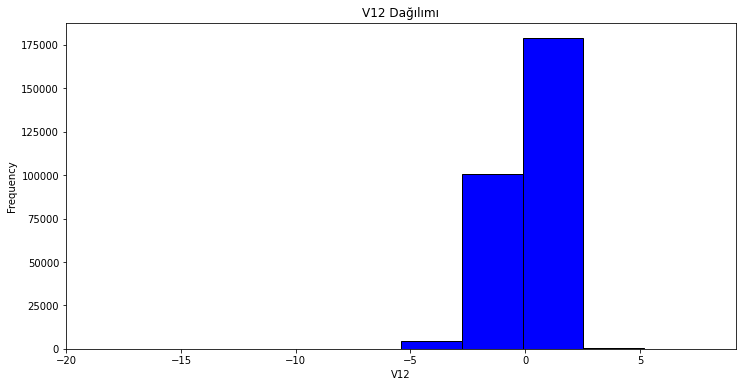

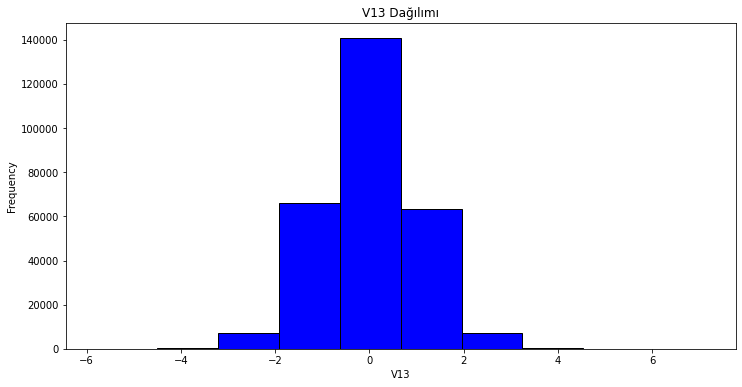

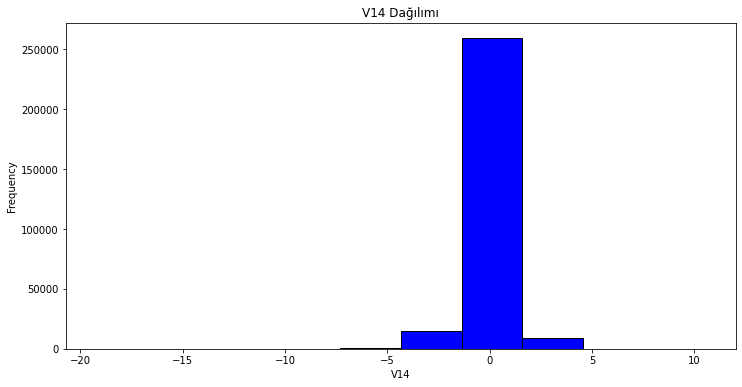

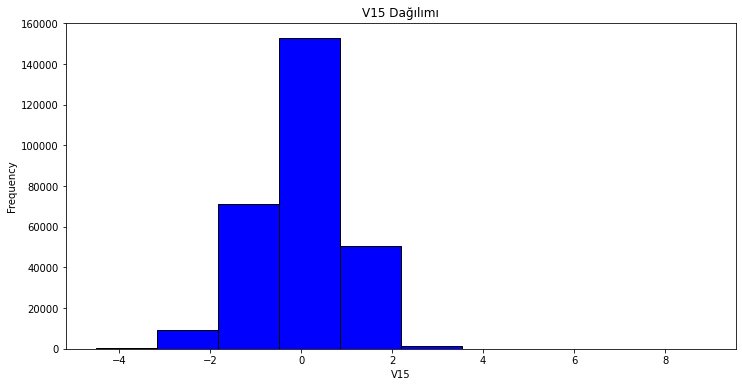

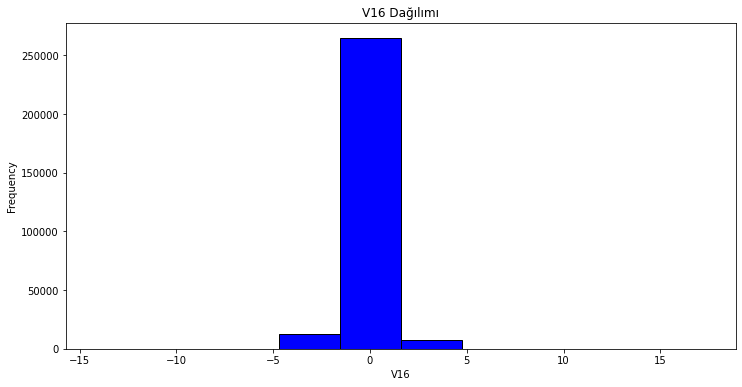

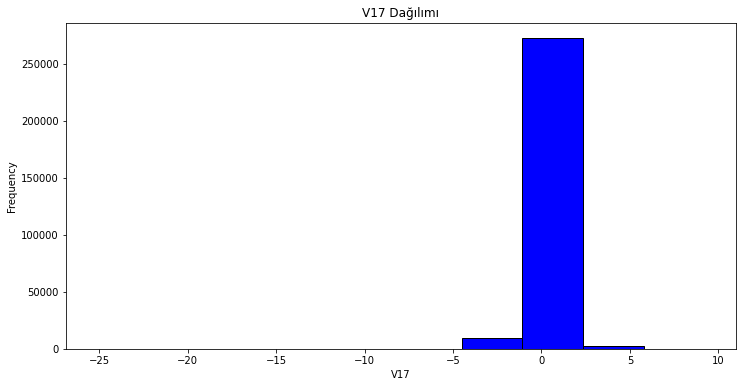

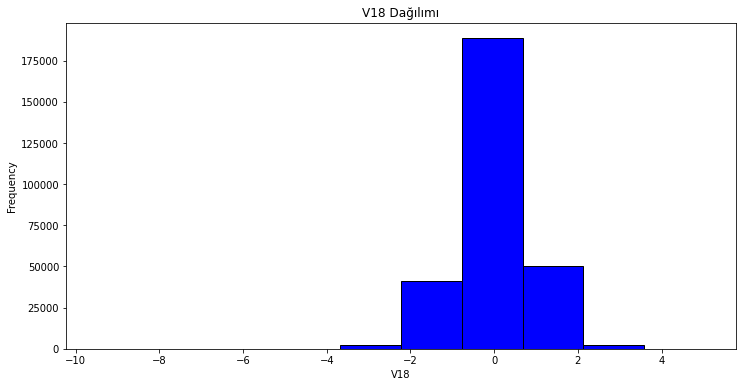

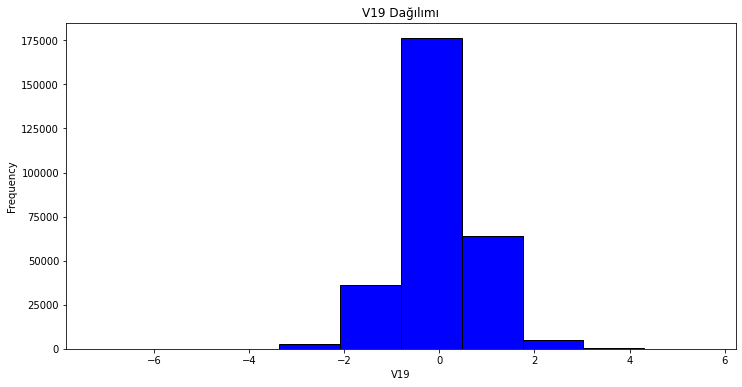

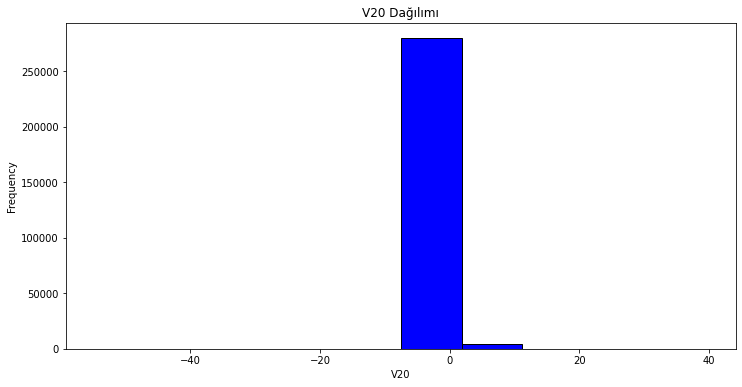

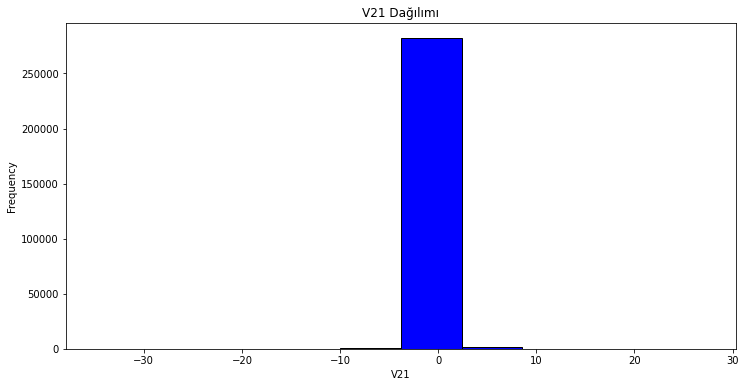

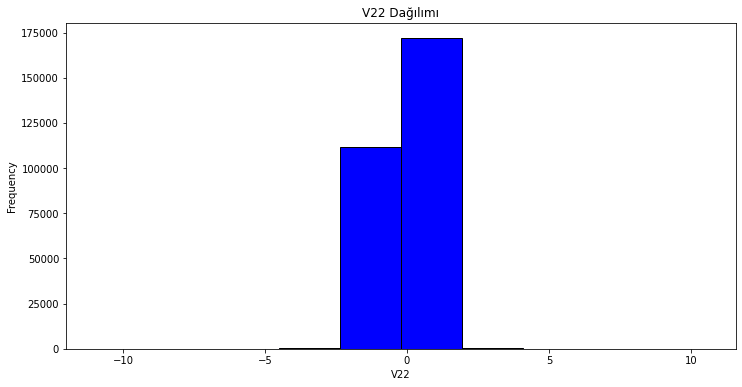

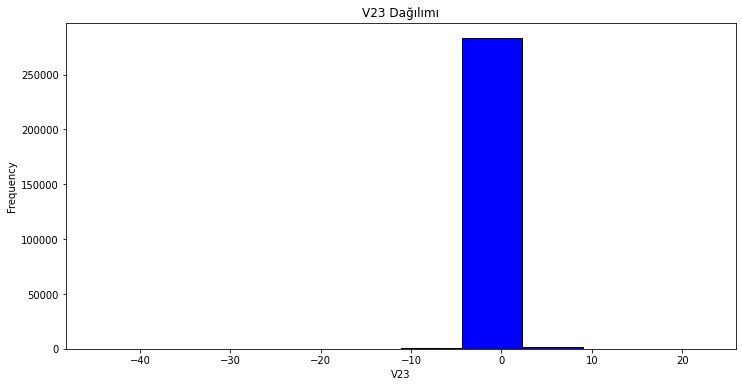

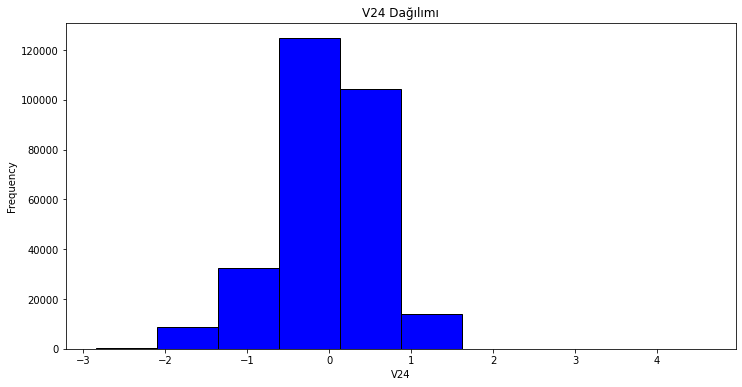

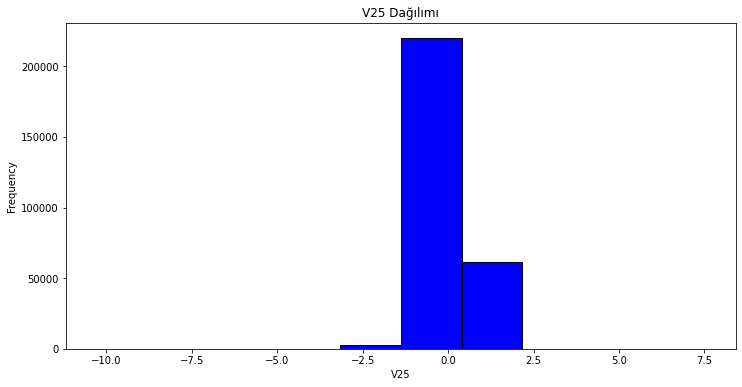

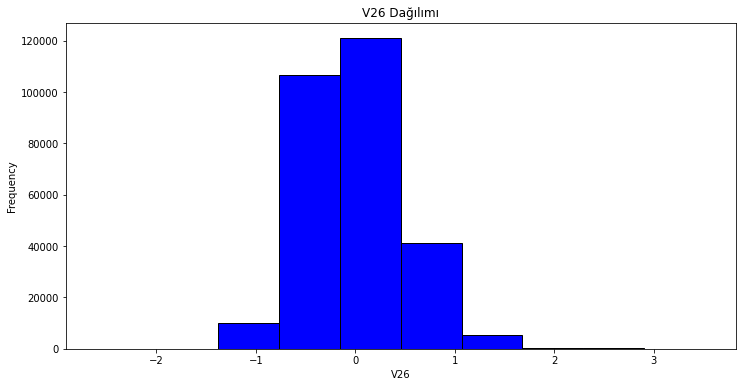

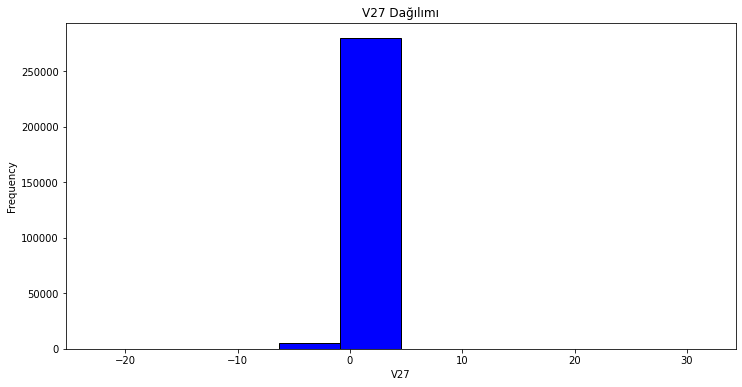

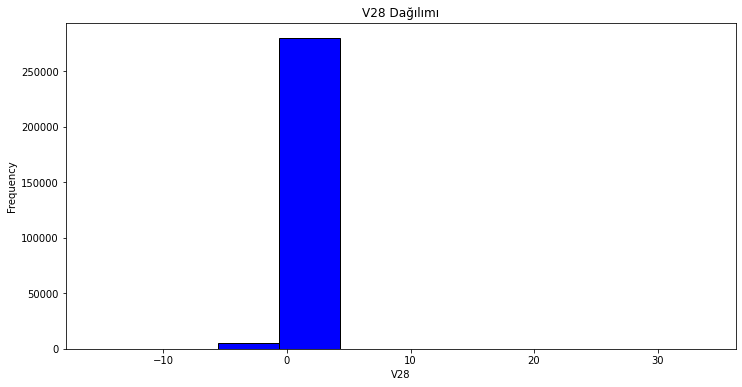

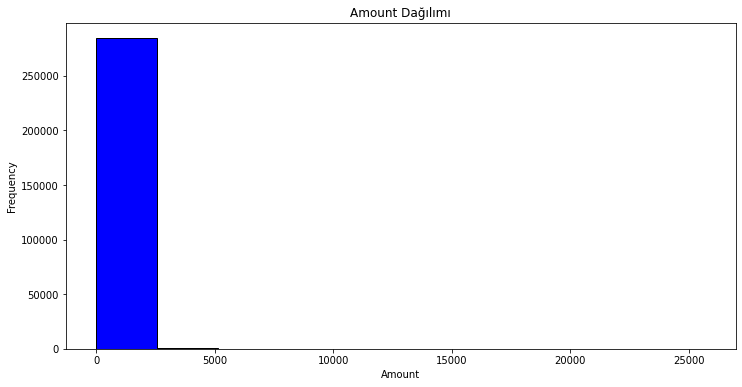

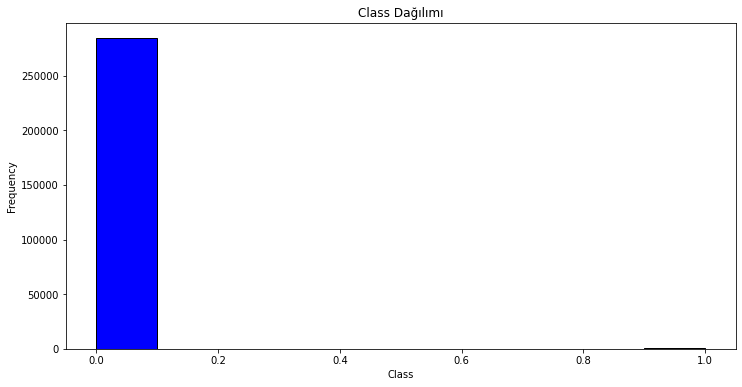

In [39]:
for column in dataset.columns:
    plt.xlabel(column)
    dataset[column].plot(kind='hist', bins=10, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"{column} Dağılımı")
    plt.show();

# **Özellik Ölçekleme**

Histograma göre aslında öznitelikler genelde -5 ile 5 arasında kümelenmiş oldukları için özenitelik ölşeklendirmeye aslında gerek yoktur. Fakat yine de yapılıp görselleştirilmiştir.

In [40]:
from sklearn import preprocessing

In [41]:
numericColumns = dataset.loc[:, 'V1': 'V28']
norm = preprocessing.MinMaxScaler().fit(numericColumns)
datasetNorm = norm.transform(numericColumns)
datasetNorm

array([[0.93519234, 0.76649042, 0.8813649 , ..., 0.39455679, 0.41897614,
        0.31269663],
       [0.97854195, 0.77006665, 0.84029849, ..., 0.44601297, 0.41634514,
        0.31342266],
       [0.93521702, 0.75311767, 0.86814082, ..., 0.40272718, 0.41548927,
        0.31191132],
       ...,
       [0.99090481, 0.76407969, 0.781102  , ..., 0.41117652, 0.41659318,
        0.31258486],
       [0.954209  , 0.77285574, 0.84958713, ..., 0.51474558, 0.41851953,
        0.31524516],
       [0.94923176, 0.7652564 , 0.84960146, ..., 0.29178597, 0.41646637,
        0.31340084]])

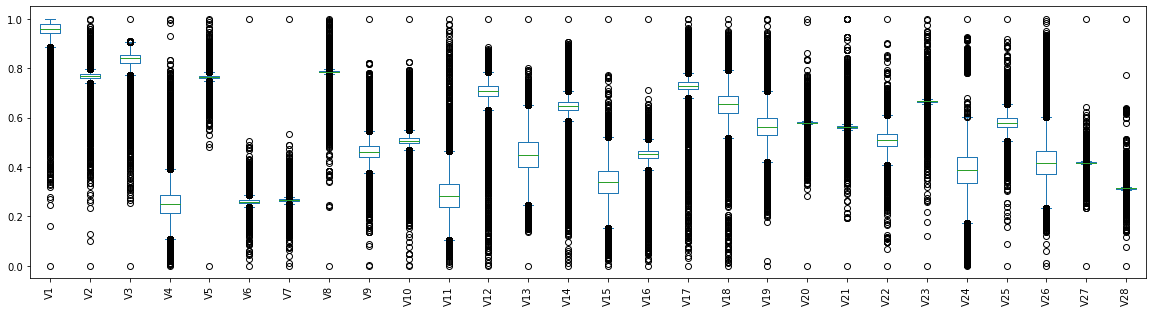

In [42]:
pd.DataFrame(datasetNorm, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);

In [43]:
norm = preprocessing.StandardScaler().fit(numericColumns)
datasetStd = norm.transform(numericColumns)
datasetStd

array([[-0.69424232, -0.04407492,  1.6727735 , ..., -0.39217043,
         0.33089162, -0.06378115],
       [ 0.60849633,  0.16117592,  0.1097971 , ...,  0.26106948,
        -0.02225568,  0.04460752],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.28844675,
        -0.13713686, -0.18102083],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ..., -0.18118178,
         0.01103672, -0.0804672 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  1.133635  ,
         0.26960398,  0.31668678],
       [-0.27233093, -0.11489898,  0.46386564, ..., -1.69685342,
        -0.00598394,  0.04134999]])

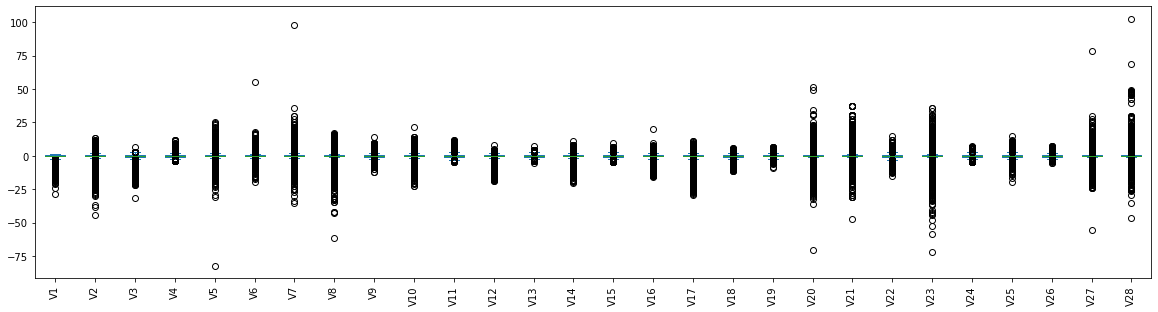

In [44]:
pd.DataFrame(datasetStd, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);